<a href="https://colab.research.google.com/github/ZemelakGoraga/image_classification/blob/main/food_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [3]:
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported#

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"zemelakgoraga","key":"9bcb68625f661266080d1c6be3de4b4b"}'}

In [4]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


# Next

# List a given datasets

#!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

## Forcefully download the dataset using Kaggle CLI
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset --force


100% 1.68G/1.68G [00:43<00:00, 42.4MB/s]
100% 1.68G/1.68G [00:43<00:00, 41.4MB/s]


In [7]:
#unzip the different data files
# There is one .csv file in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/food-image-classification-dataset.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

Streaming output truncated to the last 5000 lines.
Food Classification dataset/idli/277.jpg
Food Classification dataset/idli/278.jpg
Food Classification dataset/idli/280.jpg
Food Classification dataset/idli/282.jpg
Food Classification dataset/idli/283.jpg
Food Classification dataset/idli/284.jpg
Food Classification dataset/idli/285.jpg
Food Classification dataset/idli/286.jpg
Food Classification dataset/idli/287.jpg
Food Classification dataset/idli/288.jpg
Food Classification dataset/idli/290.jpg
Food Classification dataset/idli/292.jpg
Food Classification dataset/idli/293.jpg
Food Classification dataset/idli/295.jpg
Food Classification dataset/idli/296.jpg
Food Classification dataset/idli/297.jpg
Food Classification dataset/idli/299.jpg
Food Classification dataset/idli/300.jpg
Food Classification dataset/idli/301.jpg
Food Classification dataset/idli/302.jpg
Food Classification dataset/idli/303.jpg
Food Classification dataset/idli/305.jpg
Food Classification dataset/idli/307.jpg
Food C

In [5]:
import zipfile
import os

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/food-image-classification-dataset.zip"

# Specify the directory where you want to extract the files
extraction_dir = "foodimage"  # Change this to your desired extraction directory

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the ZIP archive to the specified directory
    zip_ref.extractall(extraction_dir)

# Print the directory where the files are extracted
print("Files extracted to:", os.path.abspath(extraction_dir))


Files extracted to: /content/foodimage


In [7]:
import os

# Specify the root directory path
root_directory = "/content/foodimage"

# Change the current working directory to the root directory
os.chdir(root_directory)

# Now the current working directory is the root directory


In [10]:
# know the directory, in this project case, the directory is 'Food Classification dataset'
!ls

'Food Classification dataset'		 kaggle.json
 foodimage				 trained_model.h5
 food-image-classification-dataset.zip


Dataset Overview:
Class: chole_bhature	| Number of Images: 376
Class: ice_cream	| Number of Images: 1000
Class: kulfi	| Number of Images: 214
Class: kaathi_rolls	| Number of Images: 279
Class: Crispy Chicken	| Number of Images: 1500
Class: cheesecake	| Number of Images: 1000
Class: Sandwich	| Number of Images: 1500
Class: burger	| Number of Images: 331
Class: Donut	| Number of Images: 1500
Class: chapati	| Number of Images: 327
Class: kadai_paneer	| Number of Images: 334
Class: pizza	| Number of Images: 275
Class: pav_bhaji	| Number of Images: 305
Class: chai	| Number of Images: 344
Class: Baked Potato	| Number of Images: 1500
Class: idli	| Number of Images: 302
Class: dal_makhani	| Number of Images: 295
Class: masala_dosa	| Number of Images: 273
Class: sushi	| Number of Images: 1000
Class: pakode	| Number of Images: 269
Class: fried_rice	| Number of Images: 350
Class: Taquito	| Number of Images: 1500
Class: omelette	| Number of Images: 1000
Class: Fries	| Number of Images: 1500
Class:

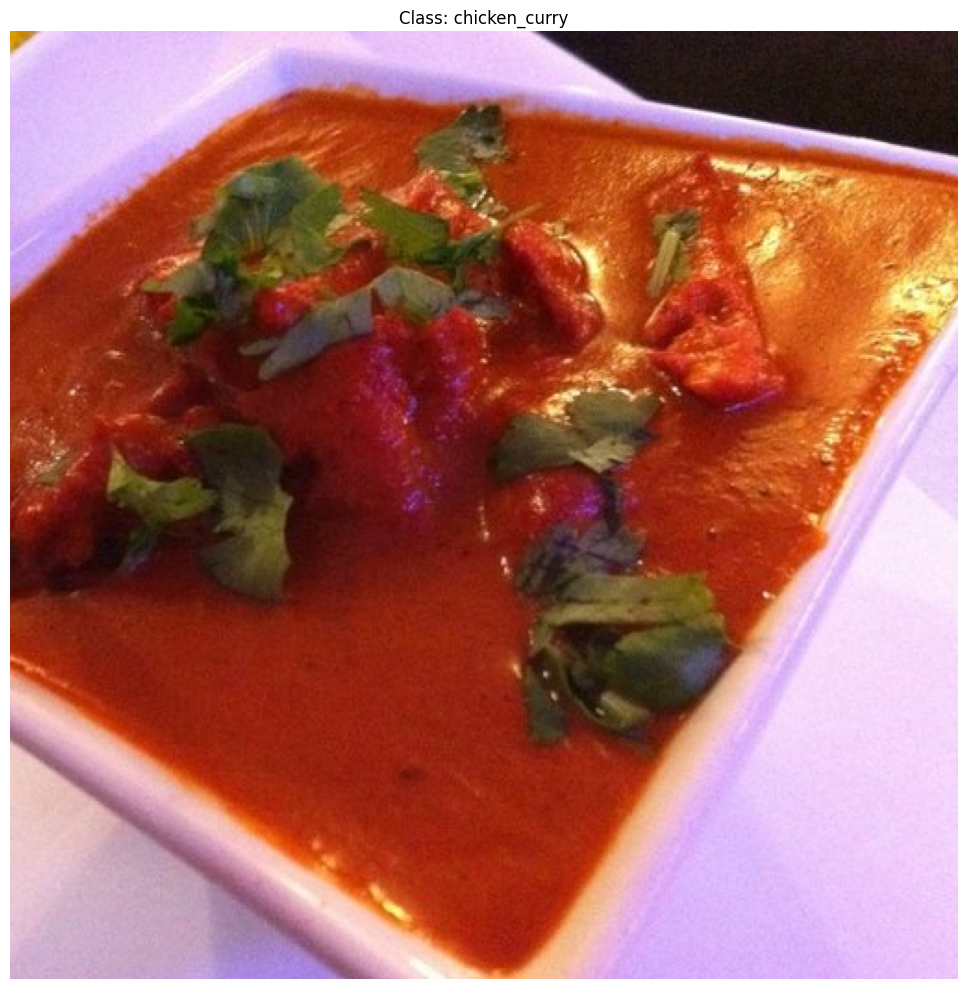

In [12]:
# Overview of the dataset

import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Dictionary to store class counts and sample images
class_counts = {}
class_sample_images = {}

# Loop through each class
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    image_names = os.listdir(class_dir)

    # Store the number of images in each class
    class_counts[class_name] = len(image_names)

    # Choose a random sample image from each class
    if len(image_names) > 0:
        sample_image_name = random.choice(image_names)
        sample_image_path = os.path.join(class_dir, sample_image_name)
        sample_image = Image.open(sample_image_path)
        class_sample_images[class_name] = sample_image

# Display an overview of the dataset
print("Dataset Overview:")
for class_name, count in class_counts.items():
    print(f"Class: {class_name}\t| Number of Images: {count}")

# Display sample images
plt.figure(figsize=(15, 10))
for i, (class_name, sample_image) in enumerate(class_sample_images.items()):
    #plt.subplot(3, 5, i + 1)
    plt.imshow(sample_image)
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


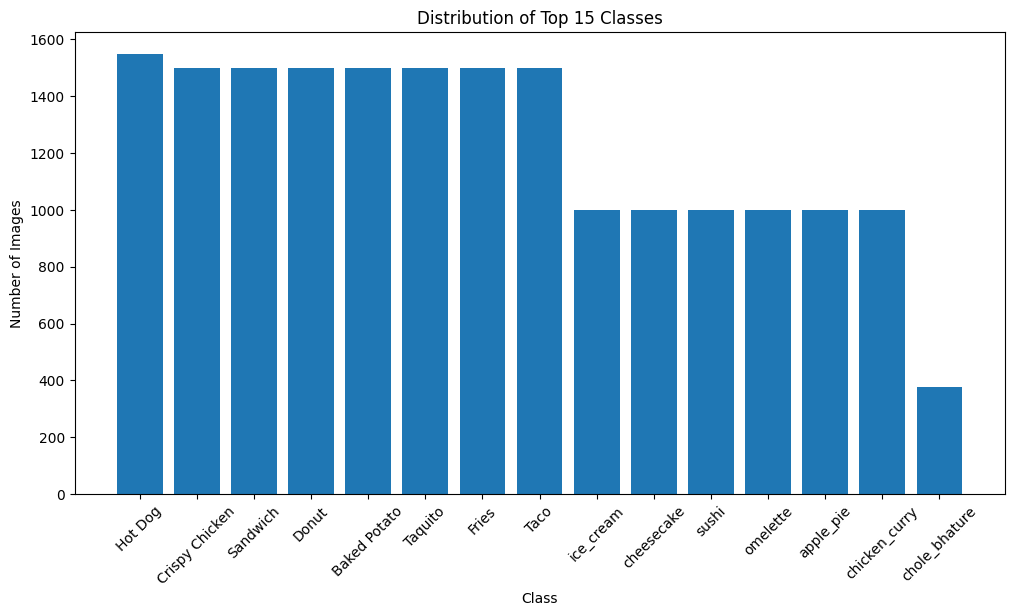

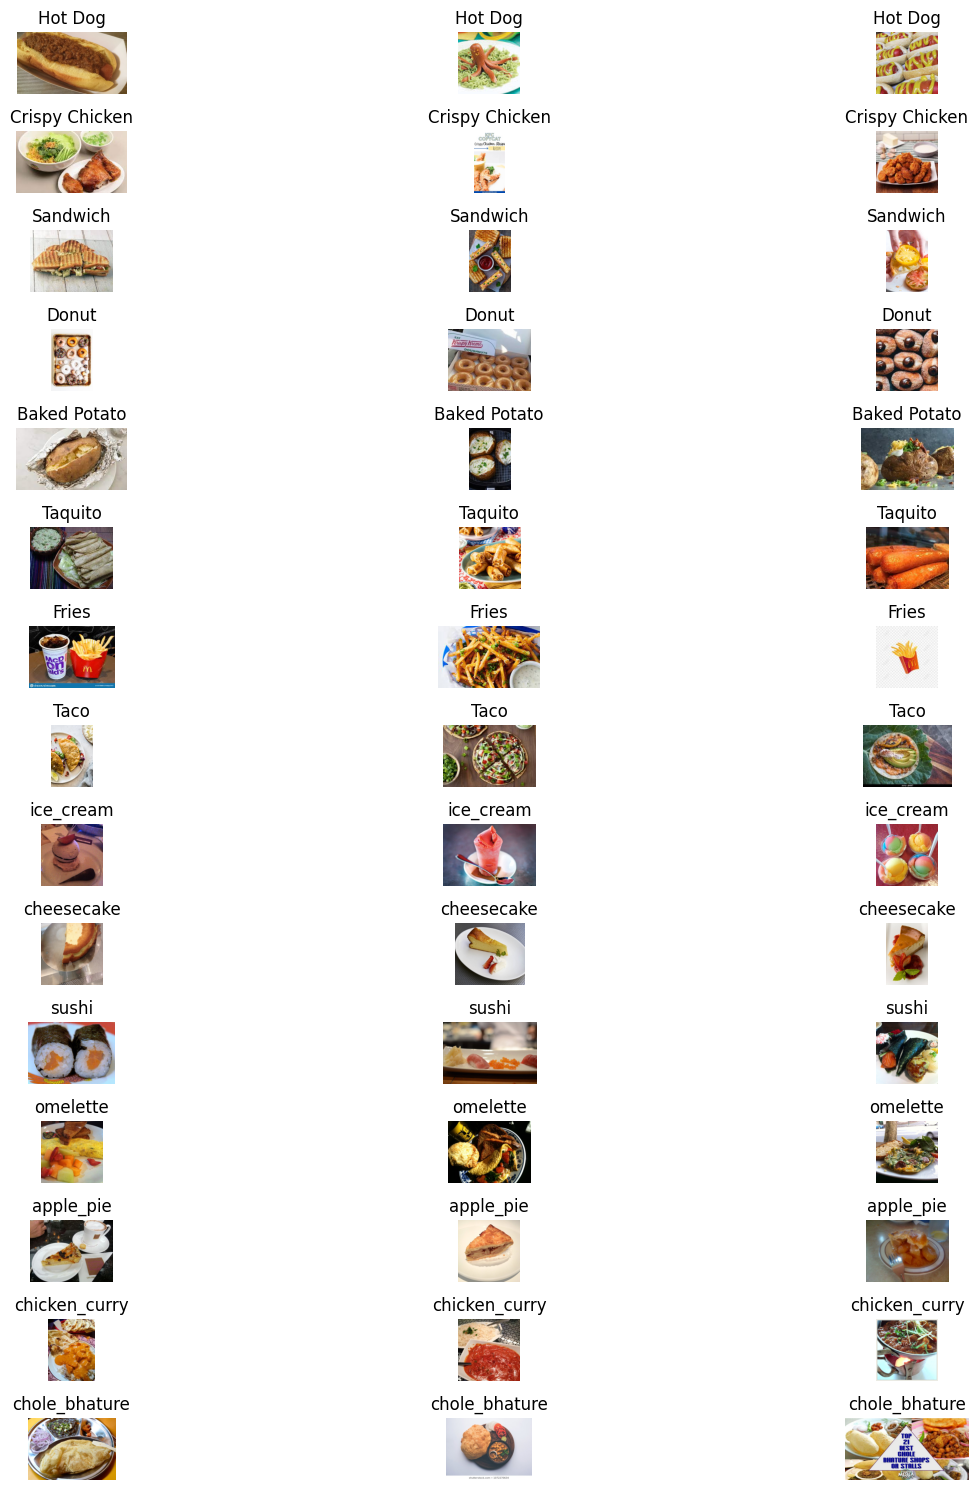

In [14]:
# Distribution of the top 15 classes of images: each class has 3 sample images
import os
import matplotlib.pyplot as plt
import random
from collections import Counter

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in class_names}

# Sort classes by image count and get the top 15 classes
top_classes = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True)[:15])

# Plot the distribution of top classes
plt.figure(figsize=(12, 6))
plt.bar(top_classes.keys(), top_classes.values())
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Top 15 Classes')
plt.show()

# Open and display a few random images from the top 15 classes
num_sample_images = 3
plt.figure(figsize=(15, 15))
for class_name in top_classes.keys():
    class_dir = os.path.join(dataset_dir, class_name)
    image_names = os.listdir(class_dir)
    sample_images = random.sample(image_names, num_sample_images)
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(class_dir, image_name)
        image = plt.imread(image_path)
        plt.subplot(len(top_classes), num_sample_images, i + 1 + list(top_classes.keys()).index(class_name) * num_sample_images)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [18]:
!pip install squarify

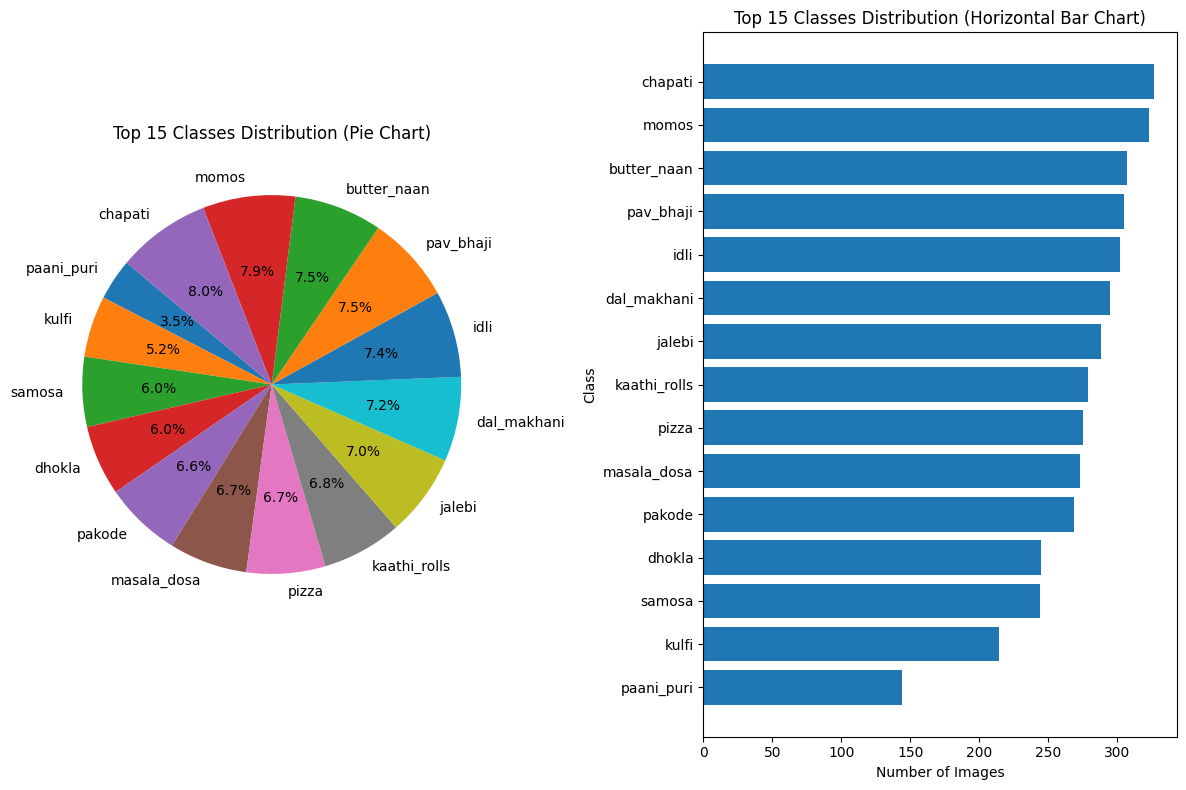

In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Dictionary to store class counts
class_counts = {}

# Loop through each class and calculate class counts
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    image_names = os.listdir(class_dir)
    class_counts[class_name] = len(image_names)

# Get the top 15 classes
top_classes = sorted(class_counts, key=class_counts.get)[:15]

# Create a dictionary to store class counts for the top 15 classes
top_class_counts = {class_name: class_counts[class_name] for class_name in top_classes}

# Plot Pie Chart for Top 15 Classes (sorted from small to big)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(top_class_counts.values(), labels=top_class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Top 15 Classes Distribution (Pie Chart)")

# Plot Horizontal Bar Chart for Top 15 Classes (sorted from small to big)
plt.subplot(1, 2, 2)
plt.barh(list(top_class_counts.keys()), list(top_class_counts.values()))
plt.xlabel("Number of Images")
plt.ylabel("Class")
plt.title("Top 15 Classes Distribution (Horizontal Bar Chart)")

plt.tight_layout()
plt.show()


In [11]:
# Number of images in different image_size groups of the same class: the case of class: Donut
import os
import random
from PIL import Image

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Choose a random class
selected_class = random.choice(class_names)

# Get a list of image file names in the selected class
class_dir = os.path.join(dataset_dir, selected_class)
image_names = os.listdir(class_dir)

# Choose a few random images from the class
num_sample_images = 3
sample_image_names = random.sample(image_names, num_sample_images)

# Print metadata for each sample image
for image_name in sample_image_names:
    image_path = os.path.join(class_dir, image_name)
    image = Image.open(image_path)

    # Print image label
    print(f"Image: {image_name} | Label: {selected_class}")

    # Print image size
    print(f"Image Size: {image.size}")

    # If available, print Exif data or other metadata
    if hasattr(image, '_getexif'):
        exif_data = image._getexif()
        print("Exif Data:")
        #for tag, value in exif_data.items():
            #print(f"Tag: {tag}, Value: {value}")

    # Display the image
    image.show()

    print("\n" + "="*40 + "\n")


Image: Donut (819).jpeg | Label: Donut
Image Size: (183, 275)
Exif Data:


Image: Donut (544).jpeg | Label: Donut
Image Size: (194, 260)
Exif Data:


Image: Donut (593).jpeg | Label: Donut
Image Size: (100, 100)
Exif Data:




In [11]:
# Define the dataset directory
dataset_dir = 'Food Classification dataset'

In [14]:
# Data preprocessing
image_size = (224, 224)

class_names = os.listdir(dataset_dir)
num_classes = len(class_names)

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = cv2.resize(image, image_size)
        images.append(image)
        labels.append(class_name)

X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    rescale=1.0/255.0
)

datagen.fit(X_train)


In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (19098, 224, 224, 3)
y_train shape: (19098,)


In [16]:

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [ ]:
import numpy as np
import tensorflow as tf

# Assuming your y_train and y_test are currently in string format
# Convert labels to integers
label_to_idx = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train = np.array([label_to_idx[label] for label in y_train])
y_test = np.array([label_to_idx[label] for label in y_test])

# Cast labels to tf.int32
y_train = tf.cast(y_train, tf.int32)
y_test = tf.cast(y_test, tf.int32)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=2,
                    validation_data=(X_test, y_test))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


150/150 [==============================] - 37s 244ms/step - loss: 322.4842 - accuracy: 0.0928
Test loss: 322.4842
Test accuracy: 0.0928


150/150 [==============================] - 38s 252ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.09      0.04      0.06       308
           2       0.16      0.74      0.26       281
           3       0.38      0.07      0.12       321
           4       0.15      0.08      0.10       289
           5       0.00      0.00      0.00       295
           6       0.10      0.19      0.13       293
           7       0.00      0.00      0.00       290
           8       0.00      0.00      0.00       206
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00        57
          11       0.00      0.00      0.00        73
          12       0.00      0.00      0.00        67
          13       0.81      0.06      0.11       230
          14       0.00      0.00      0.00       203
          15       0.00      0.00      0.00        77
          16       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


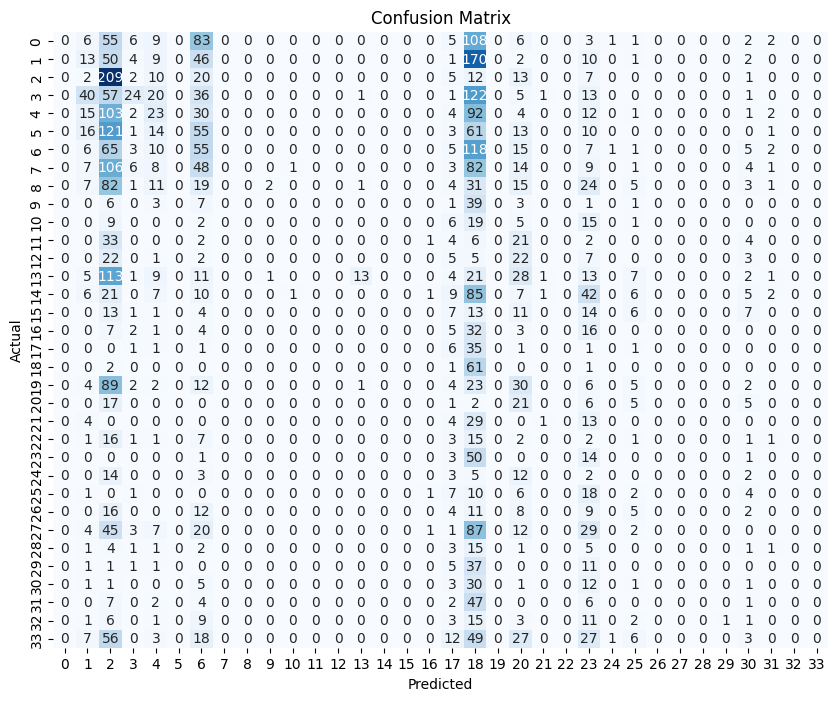

In [23]:
import seaborn as sns  # Add this import at the top

# Rest of your code

# Classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
from tensorflow.keras.models import save_model

# ... (Previous code for model training)

# Save the trained model to a file
model.save('trained_model.h5')

# You can also save the model in a different format (e.g., SavedModel format)
# model.save('saved_model', save_format='tf')

print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [ ]:
# Preprocess the data (normalize pixel values)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create a MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a transfer learning model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 1

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Transfer Learning Model - Test Accuracy:", accuracy)


In [ ]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in class_names}

# Sort classes by image count and get the top 15 classes
top_classes = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True)[:15])

# Function to compute brightness value of an image
def compute_brightness(image):
    return np.mean(image)

# Dictionary to store preferred images for each class
preferred_images = {}

# Find the most preferred image for each class
for class_name in top_classes.keys():
    class_dir = os.path.join(dataset_dir, class_name)
    image_names = os.listdir(class_dir)
    preferred_image = None
    max_brightness = -1

    for image_name in image_names:
        image_path = os.path.join(class_dir, image_name)
        image = plt.imread(image_path)
        brightness = compute_brightness(image)
        if brightness > max_brightness:
            preferred_image = image
            max_brightness = brightness

    preferred_images[class_name] = preferred_image

# Display the preferred images
plt.figure(figsize=(15, 15))
for i, class_name in enumerate(preferred_images.keys()):
    plt.subplot(len(preferred_images), 1, i + 1)
    plt.imshow(preferred_images[class_name])
    plt.title(f"Preferred Image for {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

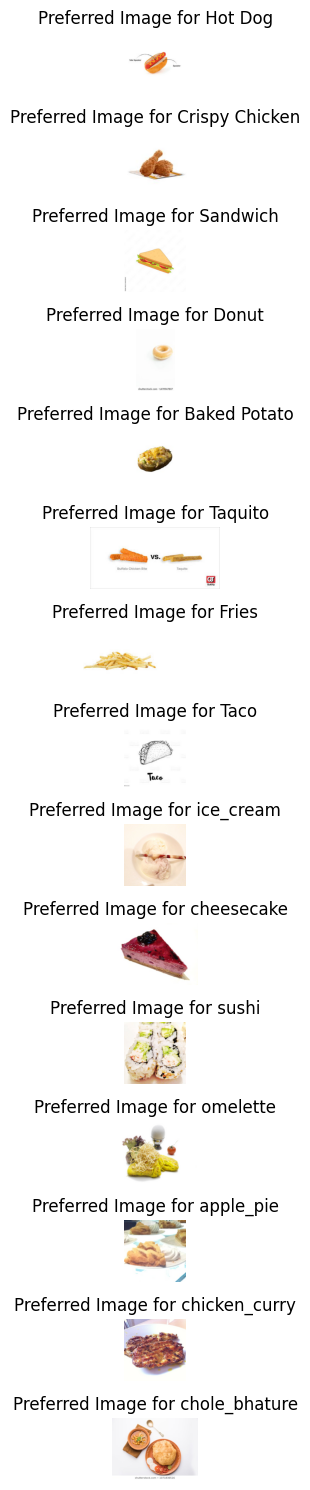

In [16]:
# Consumers preference for a specific sample_image of a given class (e.g. based on brightness of the image)
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter
from PIL import Image

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Get a list of class names (subdirectories)
class_names = os.listdir(dataset_dir)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in class_names}

# Sort classes by image count and get the top 15 classes
top_classes = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True)[:15])

# Function to compute brightness value of an image
def compute_brightness(image):
    return np.mean(image)

# Dictionary to store preferred images for each class
preferred_images = {}

# Find the most preferred image for each class
for class_name in top_classes.keys():
    class_dir = os.path.join(dataset_dir, class_name)
    image_names = os.listdir(class_dir)
    preferred_image = None
    max_brightness = -1

    for image_name in image_names:
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        image = np.array(image)  # Convert PIL image to numpy array
        brightness = compute_brightness(image)
        if brightness > max_brightness:
            preferred_image = image
            max_brightness = brightness

    preferred_images[class_name] = preferred_image

# Display the preferred images
plt.figure(figsize=(15, 15))
for i, class_name in enumerate(preferred_images.keys()):
    plt.subplot(len(preferred_images), 1, i + 1)
    plt.imshow(preferred_images[class_name])
    plt.title(f"Preferred Image for {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset directory
dataset_dir = 'Food Classification dataset'

# Specify the class name
class_name = 'Hot Dog'

# Create a directory path for the specified class
class_dir = os.path.join(dataset_dir, class_name)

# Get a list of image file names in the class directory
image_names = os.listdir(class_dir)

# List to store pixel values for all images
pixel_values = []

# Calculate statistics for each image
for image_name in image_names:
    image_path = os.path.join(class_dir, image_name)
    image = Image.open(image_path)
    image_array = np.array(image) / 255.0
    pixel_values.extend(image_array.reshape(-1, 3))

# Convert pixel values to numpy array
pixel_values = np.array(pixel_values)

# Compute statistics
mean_rgb = np.mean(pixel_values, axis=0)
std_rgb = np.std(pixel_values, axis=0)

# Display statistics
print(f"Descriptive Statistics for {class_name} Pictures:")
print(f"Mean RGB: {mean_rgb}")
print(f"Standard Deviation RGB: {std_rgb}")

# Plot histogram
plt.figure(figsize=(15, 5))
plt.hist(pixel_values[:, 0], bins=50, color='r', alpha=0.7, label='Red Channel')
plt.hist(pixel_values[:, 1], bins=50, color='g', alpha=0.7, label='Green Channel')
plt.hist(pixel_values[:, 2], bins=50, color='b', alpha=0.7, label='Blue Channel')
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Pixel Values for {class_name} Pictures")
plt.legend()
plt.show()
